In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline, make_union
from sklearn.base import TransformerMixin
from sklearn.feature_selection import SelectKBest
import itertools
from sklearn.linear_model import SGDRegressor
from sklearn.cross_validation import KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import operator
plt.style.use('ggplot')
%matplotlib inline


import pandas
import numpy as np
from sklearn.grid_search import GridSearchCV
dfNotNull = pandas.read_csv('Long.csv')
dfNotNull = dfNotNull[dfNotNull.noCPT == 0]
dfNotNull = dfNotNull[dfNotNull.Procedure3 <> 'Not Assigned']

dfNotNull.head()


print "Average Time:"
print dfNotNull.TotalTimeMin.mean()

print "procedure Value Counts" 
print dfNotNull.Procedure3.value_counts()

Average Time:
34.0968703428
procedure Value Counts
Lumbar Radiofrequency                    221
Lumbar ESI                               141
Lumbar Medial Branch Block               113
Facet Joint Injection                     69
Cervical/Thoracic Medial Branch Block     42
Spinal Cord Stimulator                    26
Cervical/Thoracic ESI                     25
Cervical/Thoracic Radiofrequency          18
Joint Injection, other                     9
Nerve Block                                7
Name: Procedure3, dtype: int64


In [ ]:
print "get null scores"

numFolds = 5
y = dfNotNull['TotalTimeMin']
X = dfNotNull['Procedure4']
abse =[]
sqrd =[]

import CleanDefs
for i in range(1,5):
    kf = KFold(len(X), numFolds, shuffle=True)
    for train_indices, test_indices in kf:
        features_train = X[train_indices]
        response_train= y[train_indices]
        features_test = X[test_indices]
        response_test = y[test_indices]

        dfT = pandas.DataFrame()
        dfT['Procedure4'] = features_train
        dfT['TotalTimeMin']= response_train
        dfT['AverageProcTime']=dfT['TotalTimeMin'].mean()
        
        dfR = pandas.DataFrame()
        dfR['Procedure4'] = features_test
        dfR['TotalTimeMin']= response_test
        dfR['AverageProcTime']=dfT['TotalTimeMin'].mean()

        y1 = dfR['TotalTimeMin']
        X1 = dfR['AverageProcTime']
        differences = (y1 - X1).abs()
        abse += [differences.mean()]
        sqrd += [(differences**2).mean()]
        
        
print "Total Average Null:"
print np.sqrt(np.array(sqrd)).mean()
print np.array(abse).mean()



numFolds = 5

y = dfNotNull['TotalTimeMin']
X = dfNotNull['Procedure4']

abse =[]
sqrd =[]
for i in range(1,5):
    kf = KFold(len(X), numFolds, shuffle=True)
    smlSqrd =[]
    for train_indices, test_indices in kf:
        features_train = X[train_indices]
        response_train= y[train_indices]
        features_test = X[test_indices]
        response_test = y[test_indices]

        dfT = pandas.DataFrame()
        dfT['Procedure4'] = features_train
        dfT['TotalTimeMin']= response_train
        dfT['AverageProcTime']=dfT['Procedure4'].apply(lambda x: CleanDefs.createProcAvgs(x,dfT) )
        dfR = pandas.DataFrame()
        dfR['Procedure4'] = features_test
        dfR['TotalTimeMin']= response_test
        dfR['AverageProcTime']=dfR['Procedure4'].apply(lambda x: CleanDefs.createProcAvgs(x,dfT) )
        
        y1 = dfR['TotalTimeMin']
        X1 = dfR['AverageProcTime']
        differences = (y1 - X1).abs()
        abse += [differences.mean()]
        
        smlSqrd += [(differences**2).mean()]
    #print np.array([smlSqrd])
    sqrd += [np.sqrt(np.array(smlSqrd)).mean()]
print "Procedure Average Null:"
print np.array(abse).mean()

print np.array(sqrd).mean()




In [ ]:
print len(dfNotNull)

In [ ]:
print "Different Features sets and corr plots"

Procedure3feat = ['Lumbar Radiofrequency', 'Cervical/Thoracic Radiofrequency', 'Facet Joint Injection', 'Cervical/Thoracic ESI'] 
Procedure3feat += ['Cervical/Thoracic Medial Branch Block', 'Spinal Cord Stimulator', 'Nerve Block', 'Lumbar Medial Branch Block']
Procedure3feat += ['Lumbar ESI', 'Joint Injection, other']
                  
Procedure4feat = ['Radiofrequency','ESI', 'Medial Branch Block', 'Injection',  'Nerve Block 2','Spinal Cord Stimulator 2']
                  
ClassFeat = ['3', 'Gender', '1r']

NonScaledContfeat  = ['Age','BMI','HealthCodesLen', 'SurgicalHistoryLen']

ScaledContfeat  = ['AgeScaled','BMIScaled','HealthCodesLenScaled', 'SurgicalHistoryLenScaled']

HealthCodes = ['M54', 'G25', 'M51', 'M50', 'M53', 'G54', 'E78', 'C177', 'D51', 'G3', 'G2', 'N28', 'I73', 'M48', 'M43', 'M41', 'M46', 'M47', 'Z79', 'F32', 'G57', 'D68', 'Q76', 'Z72', 'Y92', 'T85', 'I69', 'C182', 'M32', 'G40','F03', 'G47', 'C178', 'Y83', 'Y84', 'I50', 'C45', 'E05', 'M25', 'F12', 'F17', 'K74', 'I48', 'I42', 'C79', 'I25','E11', 'J45', 'C6', 'L40', 'E21', 'C189', 'N1', 'M96', 'M10', 'M12', 'M19', 'F41', 'Z01', 'J44', 'M79', 'J43', 'Z80','I89', 'Z85', 'Z87', 'Z86', 'Z89', 'Z88', 'C95', 'I1', 'N40', 'M84', 'M81', 'M06', 'G95', 'G90', 'R53', 'R56', 'E06', 'E07', 'K21', 'E03', 'Z96', 'Z94', 'Z95', 'Z92', 'Z90', 'Z91', 'Z98', 'E89', 'C81', 'G82', 'R26', 'Q61']

HealthCodes2 = ['C', 'E', 'D', 'G', 'F', 'I', 'K', 'J', 'M', 'L', 'N', 'Q', 'R', 'T', 'Y', 'Z']

CPTcodes = ['20610', '64479', '64640', '63650', '64483', '64480', '64634', '64635', '64636', '64484', '20605', '63685', '63688', '62311', '62310', '63661', '64494', '64495', '64633', '64490', '64491', '64492', '64493', '64450', '27096']

InsuranceCodes = ['BLUE CROSS','BLUE SHIELD','MEDICARE']
print dfNotNull.TotalTimeMin.mean()
sigCodesList = []
for i in HealthCodes:
    if len(dfNotNull[dfNotNull[i] == 1]) > 20 and abs(dfNotNull[dfNotNull[i] == 1].TotalTimeMin.mean() - 34.18) >=3 :
        print i + " = " + str(dfNotNull[dfNotNull[i] == 1].TotalTimeMin.mean()) + ", " + str(len(dfNotNull[dfNotNull[i] == 1]))
        sigCodesList += [i]
        

for i in HealthCodes2:
    if len(dfNotNull[dfNotNull[i] == 1]) > 20 and abs(dfNotNull[dfNotNull[i] == 1].TotalTimeMin.mean() - 34.18) >=0 :
        print i + " = " + str(dfNotNull[dfNotNull[i] == 1].TotalTimeMin.mean()) + ", " + str(len(dfNotNull[dfNotNull[i] == 1]))
        sigCodesList += [i]
cptCodesList = []
for i in CPTcodes:
    if len(dfNotNull[dfNotNull[i] == 1]) > 0 and abs(dfNotNull[dfNotNull[i] == 1].TotalTimeMin.mean() - 34.18) >=0 :
        print i + " = " + str(dfNotNull[dfNotNull[i] == 1].TotalTimeMin.mean()) + ", " + str(len(dfNotNull[dfNotNull[i] == 1]))
        cptCodesList += [i]
    
    
feature_cols = Procedure3feat + Procedure4feat + ClassFeat + NonScaledContfeat + sigCodesList
corrDF = dfNotNull[ NonScaledContfeat + ['TotalTimeMin']]
corrDF.corr()
print sigCodesList

In [ ]:
print """
Run Linear Regression Train-Test Split ****
"""
feature_cols = ['63650', '64635', '64636', '63685', '63688', '63661', 'ESI', 'Lumbar Radiofrequency', 'Radiofrequency']
X = dfNotNull[feature_cols]
y = dfNotNull['TotalTimeMin']


abse = []
sqrd = []
for i in range(1,2):
    features_train, features_test, response_train, response_test \
    = train_test_split(X, y, random_state=4)
    # instantiate and fit

    
    linreg = LinearRegression()
    linreg.fit(features_train, response_train)
    print type(features_test)
    predictionDF = pandas.DataFrame()
    predictionDF['Predictions'] = linreg.predict(features_test)
    predictionDF['Actual'] = response_test.values
    differences = (predictionDF['Predictions'] - predictionDF['Actual']).abs()
    abse += [differences.mean()]
    sqrd += [(differences**2).mean()]
print np.array(abse).mean()
print np.sqrt(np.array(sqrd)).mean() 
f = lambda x:int(round(x/15.)*15)


print predictionDF.head(15)
print zip(feature_cols,linreg.coef_) 


In [ ]:

        
        
        
print """
Run Linear Regression w/ Iteartive Feature Selection ****
"""
feature_cols = ['64640', '63650', '64634', '64480', '64635', '64636', '64484', '20605', '63685', '63688', '62311', '62310', '63661', '64494', '64495', '64633', '64490', '64491', '64492', '64493', '64450', '27096', 'Gender', 'Age', 'F17', '3', '1r', 'ESI', 'Lumbar Radiofrequency', 'Nerve Block 2', 'Radiofrequency']
feature_cols = ['Lumbar Radiofrequency', 'Radiofrequency', 'ESI', 'Nerve Block 2', 'Injection', 'Medial Branch Block', '3', '1r', 'Gender', 'F17', 'Age']
feature_cols += ['64640', '63650', '64634', '64480', '64635']
X = dfNotNull[feature_cols]
y = dfNotNull['TotalTimeMin']



def cross_val_Lin_ITER(X, y):
    
    
    linreg2 = LinearRegression()
   
    
    mean2escores3 = cross_val_score(linreg2 , X, y, cv=5, scoring='mean_squared_error')
    meanAbsScores3= cross_val_score(linreg2 , X, y, cv=5, scoring='mean_absolute_error')
    return (mean2escores3,meanAbsScores3) # return average R2

mean2escorelist = []
for L in range(27, len(feature_cols)+1):
    print L
    print "good score list"
    print mean2escorelist.sort()
    
   
    for subset in itertools.combinations(feature_cols, L):
        
        Subset = list(subset)
        X = dfNotNull[Subset]
        cvScores= cross_val_Lin_ITER(X, y)
        
        mean2escores = cvScores[0]
        mean2escores = np.mean(np.sqrt(-mean2escores))
        meanAbsScores= cvScores[1]
        meanAbsScores= -meanAbsScores.mean()
        
        if mean2escores < 8.89 and meanAbsScores <  6.10:
            mean2escorelist+= [mean2escores]
            
            print subset    
            print "root mean squared error"
            
            print mean2escores
            print "mean Abs Scores"

            print meanAbsScores
            print '\n'
            


In [ ]:
print 5

In [6]:
print "Standar Linear Regression W/ Cross Validation"

cptCodesList = []



feature_cols =['64640', '63650', '64634', '64480', '64635', '64636', '64484']
#feature_cols =['63685', '63650', 'Radiofrequency', 'Lumbar Radiofrequency', '64636', '64635', 'ESI', '64484', '64493']
len(feature_cols)
X = dfNotNull[feature_cols]
y = dfNotNull['TotalTimeMin']
print len(X)
print len(y)
    
    
linreg3 = LinearRegression()
param_grid = dict()
filter1 = SelectKBest(k=len(feature_cols)-5) # select the best 2 features
    
pipe = Pipeline([('anova', filter1), ('lr', linreg3)])
mean2escores3= cross_val_score(linreg3 , X, y, cv=5, scoring='mean_squared_error')
mean2escores5 = cross_val_score(linreg3 , X, y, cv=5, scoring='mean_absolute_error')
#grid1 = GridSearchCV(linreg3 , param_grid, cv=5, scoring='mean_squared_error').fit(X,y)
#mean2escores3 = cross_val_score(grid1.best_estimator_ , X, y, cv=5, scoring='mean_squared_error')
print mean2escores3

mean2escores =np.sqrt(-mean2escores3).mean()
meanAbsScores= -mean2escores5.mean()


print feature_cols
print "mean squared error"           
print np.sqrt(mean2escores)
print "mean Abs Scores"

print meanAbsScores
print '\n'

print len(feature_cols)

Standar Linear Regression W/ Cross Validation
671
671
[ -1.73101371e+02  -1.06274531e+02  -6.90191203e+01  -5.22018883e+21
  -1.07439265e+02]
['64640', '63650', '64634', '64480', '64635', '64636', '64484']
mean squared error
120208.88012
mean Abs Scores
1248304986.67


7


In [13]:
"Select KBest Linear Regression"

from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline, make_union
print "Run  regression without scalar and with cross validation xyy"

feature_cols =['64640', '63650', '64634', '64480', '64635', '64636', '64484', '20605', '63685', '63688', '62311', 
'62310', '63661', '64633', '64492', '64493', '64450', '27096', 'Gender', 'Age', 'F17', '3', '1r', 
'ESI', 'Lumbar Radiofrequency', 'Nerve Block 2', 'Radiofrequency']


feature_cols = ['64640', '63650', '64634', '64480', '64635', '64636', '64484', '20605', '63685', '63688', '62311', 
                '62310', '63661', '64494', '64495', '64633', '64490', '64491', '64492', '64493', '64450', '27096', 
                'Gender', 'AgeScaled', 'F17', '3', '1r', 'ESI', 'Lumbar Radiofrequency', 'Nerve Block 2', 'Radiofrequency']

#feature_cols = ['63650', '64635', '64636', '63685', '63688', '63661', 'ESI', 'Lumbar Radiofrequency', 'Radiofrequency']
X = dfNotNull[feature_cols]
total = []
y = dfNotNull['TotalTimeMin']
for i in range (1, len(feature_cols)+1):
    #gridsearch with select kbest
    param_grid = dict()
    linreg4 = LinearRegression()
    filter1 = SelectKBest(k=i) # select the best 2 features
    
    pipe = Pipeline([('anova', filter1), ('lr', linreg4)])
    grid1 = GridSearchCV(pipe, param_grid, cv=5, scoring='mean_squared_error').fit(X,y)
    grid2= GridSearchCV(pipe, param_grid, cv=5, scoring='mean_absolute_error').fit(X,y)
    
    tf_features=grid1.best_estimator_.named_steps['anova'].get_support()
    total += list(np.array(feature_cols)[tf_features])
    print 777
    print np.array(feature_cols)[tf_features]
    print 777
    abs_features=str(grid2.best_estimator_.named_steps['anova'].get_support())
    
    
    print grid1.best_estimator_
    mean2escores3 = cross_val_score(grid1.best_estimator_ , X, y, cv=5, scoring='mean_squared_error')
    
    
    
    mean2escores4 = cross_val_score(grid2.best_estimator_ , X, y, cv=5, scoring='mean_absolute_error')
   
    mean2escores =np.sqrt(-mean2escores3).mean()
    meanAbsScores= mean2escores4
    meanAbsScores= -meanAbsScores.mean()


    #print feature_list_creator(tf_features)
    print "mean squared error"
    print mean2escores3.mean()           
    print mean2escores
    print "mean Abs Scores"

    print meanAbsScores
    print '\n'

Run  regression without scalar and with cross validation xyy
777
['63685']
777
Pipeline(steps=[('anova', SelectKBest(k=1, score_func=<function f_classif at 0x000000000A92B5F8>)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])
mean squared error
-151.265945001
12.2401006457
mean Abs Scores
9.5430950324


777
['63650' '63685']
777
Pipeline(steps=[('anova', SelectKBest(k=2, score_func=<function f_classif at 0x000000000A92B5F8>)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])
mean squared error
-137.620158612
11.6516612708
mean Abs Scores
9.18899081578


777
['63650' '63685' 'Radiofrequency']
777
Pipeline(steps=[('anova', SelectKBest(k=3, score_func=<function f_classif at 0x000000000A92B5F8>)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])
mean squared error
-84.7321747252
9.04177781237
mean Abs Scores
6.52664438453


777
['63650' '63685' 'Lumbar Radiofrequency' 'Radiof

In [17]:
from collections import Counter
Counter(total).most_common(7)
list = []
for i in Counter(total).most_common(12):
    list += [i[0]]
print list
    

['63685', '63650', 'Radiofrequency', 'Lumbar Radiofrequency', '64636', '64635', 'ESI', '64484', '64493', '64494', '1r', '27096']


[12.299022115630576, 11.731161861112911, 9.2050081328169231, 9.1642965346028937, 9.1619893655497346, 9.3985162495337526, 9.0649637809227706, 9.1043896978216559, 9.0898754412316976, 9.1867532174341076, 9.0776374644778173, 9.0736497116263184]


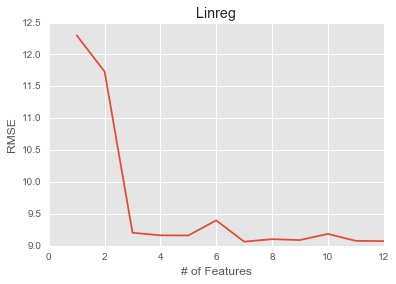

In [20]:
mean2escoresFinal = []
feature_cols =['63685', '63650', 'Radiofrequency', 'Lumbar Radiofrequency', '64636', '64635', 'ESI', '64484', '64493', '64494', '1r', '27096']
features = []
for i in feature_cols:
    features += [i]
    X = dfNotNull[features]
    y = dfNotNull['TotalTimeMin']

    linreg = LinearRegression()
   
    

    mean2escores3 = cross_val_score(linreg, X, y, cv=5, scoring='mean_squared_error')
    mean2escoresFinal += [np.sqrt(-mean2escores3.mean())]
print mean2escoresFinal
plt.plot(np.arange(1,len(mean2escoresFinal)+1),np.array(mean2escoresFinal))
plt.title("Linreg")
plt.ylabel('RMSE')
plt.xlabel('# of Features')
plt.show()

In [ ]:
print "Standard SDGC W/ GridSearch"

"Select KBest  Regression"

from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline, make_union



feature_cols = ['64640', '63650', '64634', '64480', '64635', '64636', '64484', '20605', '63685', '63688', '62311', 
                '62310', '63661', '64494', '64495', '64633', '64490', '64491', '64492', '64493', '64450', '27096', 
                'Gender', 'AgeScaled', 'F17', '3', '1r', 'ESI', 'Lumbar Radiofrequency', 'Nerve Block 2', 'Radiofrequency']


X = dfNotNull[feature_cols]
y = dfNotNull['TotalTimeMin']
for i in range (5, len(feature_cols)+1):
    #gridsearch with select kbest
    sgd = SGDRegressor()



    param_grid = {'sgd__loss':['squared_loss'], 
              'sgd__penalty':['none', 'l2', 'l1', 'elasticnet'],
               'sgd__alpha': [1e-4,1e-3,1e-2,1e-1,1,1e1],
              'sgd__n_iter': [1000]
             }
    filter1 = SelectKBest(k=i) # select the best i features
    pipe = Pipeline([('anova', filter1), ('sgd', sgd)])
    
    grid1 = GridSearchCV(pipe, param_grid, cv=5, scoring='mean_squared_error').fit(X,y)
    grid2= GridSearchCV(pipe, param_grid, cv=5, scoring='mean_absolute_error').fit(X,y)
    tf_features=str(grid1.best_estimator_.named_steps['anova'].get_support())
    abs_features=str(grid2.best_estimator_.named_steps['anova'].get_support())
    print grid1.best_estimator_
    mean2escores3 = cross_val_score(grid1.best_estimator_ , X, y, cv=5, scoring='mean_squared_error')
    mean2escores4 = cross_val_score(grid2.best_estimator_ , X, y, cv=5, scoring='mean_absolute_error')


    mean2escores =np.sqrt(-mean2escores3).mean()
    meanAbsScores= mean2escores4
    meanAbsScores= -meanAbsScores.mean()


    print feature_list_creator(tf_features)
    print "mean squared error"
    print mean2escores3.mean()           
    print mean2escores
    print "mean Abs Scores"

    print meanAbsScores
    print '\n'






"""
feature_cols =['64640', '64484', '20605', '63685', '63688', '62311', 
                '62310', '63661',  '64450', '27096', 'Gender', 'Age', 'F17',  '1r', 
                'ESI', 'Lumbar Radiofrequency', 'Nerve Block 2', 'Radiofrequency']#feature_cols += ['Gender'] #+['F17'] + ['Age'] 
tf= dfNotNull[feature_cols]
X = tf
y = dfNotNull['TotalTimeMin']

sgd = SGDRegressor()



param_grid = {'loss':['squared_loss'], 
              'penalty':['none', 'l2', 'l1', 'elasticnet'],
              'alpha': [1e-4,1e-3,1e-2,1e-1,1,1e1],
              'n_iter': [10,100,1000]
             }

grid2= GridSearchCV(sgd , param_grid, cv=5, scoring='mean_absolute_error').fit(X,y)
grid1 = GridSearchCV(sgd, param_grid, cv=5, scoring='mean_squared_error').fit(X,y)
grid1.best_estimator_
print 555
mean2escores3 = cross_val_score(grid1.best_estimator_ , X, y, cv=5, scoring='mean_squared_error')
mean2escores4 = cross_val_score(grid2.best_estimator_ , X, y, cv=5, scoring='mean_absolute_error')



mean2escores =np.sqrt(-mean2escores3).mean()
meanAbsScores= mean2escores4
meanAbsScores= -meanAbsScores.mean()


print feature_cols   
print "mean squared error"
print mean2escores3.mean()           
print mean2escores
print "mean Abs Scores"

print meanAbsScores
print '\n'
"""

In [ ]:
pipe.get_params().keys()



In [ ]:
print mean2escores

In [ ]:
print """
Run KNN Regression Cross Val All Feature Combos Piped and non piped Scalar ****
"""


"scaling pipe"
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline, make_union

from sklearn.neighbors import KNeighborsRegressor
"Scale values in the DF"   
from sklearn.base import TransformerMixin
#from sklearn import preprocessing

class FeatureScalarTransformer(TransformerMixin):
        def transform(self,X,  **transform_params):
            if 'BMI' in X:
                #X['BMI'] = preprocessing.scale(X['BMI'])
                scal = StandardScaler().fit(X['BMI'])
                X['BMI'] = scal.transform(X['BMI'])
            if 'Age' in X:
                #X['Age']= preprocessing.scale(X['Age'].astype('float'))
                scal = StandardScaler().fit(X['Age'])
                X['Age']=  scal.transform(X['Age'])
            if 'SurgicalHistoryLen' in X:
                #X['SurgicalHistoryLen'] = preprocessing.scale(X['SurgicalHistoryLen'].astype('float')
                scal = StandardScaler().fit(X['SurgicalHistoryLen'])                
                X['SurgicalHistoryLen'] = scal.transform(X['SurgicalHistoryLen'])
            if 'HealthCodesLen' in X:
                #X['HealthCodesLen'] = preprocessing.scale(X['HealthCodesLen'].astype('float'))
                scal = StandardScaler().fit(X['HealthCodesLen'])
                X['HealthCodesLen'] = scal.transform(X['HealthCodesLen'])
            
            
            return X
           

        def fit(self, X, y=None, **fit_params):
            return self



 

In [2]:
def feature_list_creator(tf_features):
    b = str(tf_features).replace('[', 'r').replace("  "," ").replace("\n","").split(" ")
    print 55
    print 55
    b =[x for x in b if x != 'r']
    feature_list = []
    for num,i in enumerate(b):
        if 'Tr' in i:
            feature_list += [feature_cols[num]]
        else:
            pass
    return feature_list

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline, make_union
print "Run KNN regression without scalar and with cross validation xyy"


feature_cols = ['64640', '63650', '64634', '64480', '64635', '64636', '64484', '20605', '63685', '63688', '62311', 
                '62310', '63661', '64494', '64495', '64633', '64490', '64491', '64492', '64493', '64450', '27096', 
                'Gender', 'Age', 'F17', '3', '1r', 'ESI', 'Lumbar Radiofrequency', 'Nerve Block 2', 'Radiofrequency']
X = dfNotNull[feature_cols]
y = dfNotNull['TotalTimeMin']
for i in range (1, len(feature_cols)+1):
    #gridsearch with select kbest
    neighbs_k = range(1, 30)
    param_grid = dict(neigh__n_neighbors=neighbs_k )
    neigh = KNeighborsRegressor()
    filter1 = SelectKBest(k=i) # select the best 2 features
    pipe = Pipeline([('anova', filter1), ('neigh', neigh)])
    grid1 = GridSearchCV(pipe, param_grid, cv=5, scoring='mean_squared_error').fit(X,y)
    grid2= GridSearchCV(pipe, param_grid, cv=5, scoring='mean_absolute_error').fit(X,y)
    tf_features=str(grid1.best_estimator_.named_steps['anova'].get_support())
    abs_features=str(grid2.best_estimator_.named_steps['anova'].get_support())
    print grid1.best_estimator_
    mean2escores3 = cross_val_score(grid1.best_estimator_ , X, y, cv=5, scoring='mean_squared_error')
    mean2escores4 = cross_val_score(grid2.best_estimator_ , X, y, cv=5, scoring='mean_absolute_error')


    mean2escores =np.sqrt(-mean2escores3).mean()
    meanAbsScores= mean2escores4
    meanAbsScores= -meanAbsScores.mean()


    print feature_list_creator(tf_features)
    print "mean squared error"
    print mean2escores3.mean()           
    print mean2escores
    print "mean Abs Scores"

    print meanAbsScores
    print '\n'

    
    
   
    
   

[17.332856014163749, 12.887379257035796, 12.690554349455805, 12.690550547421525, 10.585380611432086, 384179556.37826896, 32311573254.009933, 10465669789.211552, 180479361487.75836, 180479361487.75836, 79858505924.180206, 1047958467665.2788, 1047958467665.2933, 244025807802.37973, 1398537914419.0996, 551536861070.25891, 2326748831532.3857, 406689069748.77881, 919079934243.10645, 3825306964330.8115, 2110447570694.7175, 1438595272487.856, 1867837058608.4504, 1967018740957.7761, 4771655402104.1113, 466106715698.3988, 1975431338620.998, 1875805579637.1628, 1517976540410.4111, 4153537634074.2002, 3212211218141.3179]


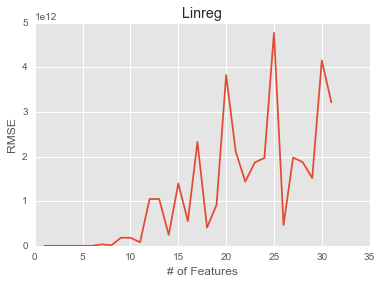

In [4]:
"My Transformer"

"""
class EnsembleTranformer(TransformerMixin):
        def __init__(self, model, y):
            self.model = model
            self.y = y
        def transform(self,X,  **transform_params):
            
            
            
            return np.array([self.model.predict(X)]).T
            
            
            
            #return X
           
# pipeline = feature union of EnsembleTranformer
        def fit(self, X, y=None, **fit_params):
            
                
                
            
            self.model.fit(X, y)
            return self"""


class EnsembleTranformer(TransformerMixin):
        def __init__(self, model, y):
            self.model = model
            self.y = y
        def transform(self,X,  **transform_params):
            
            
            
            return np.array([self.model.predict(X)]).T
            
            
            
            #return X
           
# pipeline = feature union of EnsembleTranformer
        def fit(self, X, y=None, **fit_params):
            
                
                
            
            self.model.fit(X, y)
            return self

In [ ]:

def RMSEPLOTCReate(start,Feature_Union,Model,ModelName, Title, KNT1, KNT2, feature_cols):
    mean2escoresFinal =[]
    
    for i in range (start, len(feature_cols)+1):
        #gridsearch with select kbest
        #neighbs_k = range(1, 30)
        
        filter1 = SelectKBest(k=i) # select the best 2 features
        
        param_grid = dict()
        
        if Feature_Union == 0:
            
            Pipe =  Pipeline([('anova', filter1)  
                ,('mdl', Model )
                 ])
        else:
            Pipe = Pipeline([('anova', filter1), Feature_Union
                ,('mdl', Model )
             ])
            
        
        
        X = dfNotNull[feature_cols]
        y = dfNotNull['TotalTimeMin']
        grid1 = GridSearchCV(Pipe, param_grid, cv=5, scoring='mean_squared_error').fit(X,y)
        tf_features=str(grid1.best_estimator_.named_steps['anova'].get_support())
        #abs_features=str(grid2.best_estimator_.named_steps['anova'].get_support())
        mean2escores3 = cross_val_score(grid1.best_estimator_ , X, y, cv=5, scoring='mean_squared_error')
        #mean2escores4 = cross_val_score(grid2.best_estimator_ , X, y, cv=5, scoring='mean_absolute_error')
        
        if i == 9 and "KNN" in ModelName:
            print "Feature 9 best Esitmator"
            print grid1.best_estimator_


        mean2escores =np.sqrt(-mean2escores3).mean()
        if mean2escores >19:
            print mean2escores
            break
            
        mean2escoresFinal += [mean2escores]
    
    tf_features=str(grid1.best_estimator_.named_steps['anova'].get_support())
    Features =feature_list_creator(tf_features)    
    pp ="RMSE_Graphs\\"+Title + KNT1 + KNT2 +".pdf"
    plt.plot(np.arange(1,len(mean2escoresFinal)+1),np.array(mean2escoresFinal))
    plt.title(Title)
    plt.ylabel('RMSE')
    plt.xlabel('# of Features')
    plt.show()
    plt.savefig(pp, format='pdf')
    return(feature_cols,Pipe, Title, KNT1, KNT2, mean2escoresFinal,Features)







    

In [ ]:

#Formats the inputs and calls the plots 
def call(start,FU, Model , neighs1, neighs2,feature_cols):
    
    Linreg = LinearRegression()
    Linreg1 = LinearRegression()
    KNN = KNeighborsRegressor(n_neighbors = neighs1)
    KNN1 = KNeighborsRegressor(n_neighbors = neighs2)
    SGD =  SGDRegressor(alpha=0.001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=1000, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)
    SGD1 =  SGDRegressor(alpha=0.001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=1000, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)
    
    AlgDict = {'Linreg':Linreg,'Linreg1' : Linreg1,'KNN': KNN,
          'KNN1': KNN1,'SGD1': SGD1,
           'Linreg_KNN': FeatureUnion([
                ('linreg',EnsembleTranformer(Linreg, y)),
                ('knn', EnsembleTranformer(KNN , y)),
            ]),
          'Linreg_KNN_SGD' : FeatureUnion([
                ('linreg',EnsembleTranformer(Linreg, y)),
                ('knn', EnsembleTranformer(KNN , y)),
                ('sgd', EnsembleTranformer(SGD , y)),
            ]),
          'Linreg_SGD' : FeatureUnion([
                ('linreg',EnsembleTranformer(Linreg, y)),
                ('sgd', EnsembleTranformer(SGD , y)),
            ]),
           'KNN_SGD' : FeatureUnion([
                ('knn', EnsembleTranformer(KNN , y)),
                ('sgd', EnsembleTranformer(SGD , y)),
            ])
           }
    

    #Format the neighbors for the Save File title
    if FU == 'Linreg_KNN' or FU == 'Linreg_KNN_SGD' or FU == 'KNN_SGD' or FU == 'KNN':
            KNT1 = "_"+str(neighs1)
    else:
            KNT1 = ''

    if 'KNN' in Model:
            KNT2 = str(neighs2)
            ModelName = "KNN"
    elif 'SGD' in Model:
            KNT2 = str(neighs2)
            ModelName = "SGD"
    else:
            KNT2 = ''
            ModelName = "Linreg"

    #CREATE PLOT TITLE

    if FU == 'Linreg_KNN':
        Title = "Linreg, KNN - " + ModelName + " Ensemble"
    elif FU == 'Linreg_KNN_SGD':
        Title = "Linreg, KNN, SGD - " + ModelName + " Ensemble"
    elif FU == 'Linreg_SGD':
        Title = "Linreg, SGD - " + ModelName + " Ensemble"
    elif FU == 'KNN_SGD':
        Title = "KNN, SGD - " + ModelName + " Ensemble"
    elif FU == 'KNN':
        Title = "KNN"
    elif FU == 'Linreg':
        Title = "Linreg"
    

    FUD = AlgDict[FU]
    Model = AlgDict[Model]
    
    #Map the types of ensmble to the Pipe
    if FU == 'Linreg' or FU == 'KNN':
        Feature_Union = 0
        Model = AlgDict[FU]
    else:
        Feature_Union  = ('union', FUD) 
        
    
    x= RMSEPLOTCReate(start,Feature_Union,Model,ModelName, Title, KNT1, KNT2,feature_cols)
    
    print x[2] +"**********"
    print ""
    print "Features =", x[6]
    print ""
    print "RMSE Best Score:", min(enumerate(x[5]), key=operator.itemgetter(1))
    print ""
    try:
        print "RMSE 9 Features Score",x[5][9]
    except:
        pass
    print ""
    print "RMSE 7 Best 7 Features",x[6][:7]
    print ""
    print ""
    
    print "RMSE 15 Features Score",x[5][15]
    print ""
    print "RMSE 15 Best 15 Features",x[6][:15]
    print ""
    print ""
    print "RMSE full Scores", x[5]
    print ""
    print "If Exists FU KNN # of neighbors =" + x[3]
    print "If Exists Model KNN # of neighbors = " + x[4]
    print ""

feature_cols = ['64640', '63650', '64634', '64480', '64635', '64636', '64484', '20605', '63685', '63688', '62311', 
                '62310', '63661', '64494', '64495', '64633', '64490', '64491', '64492', '64493', '64450', '27096', 
                'Gender', 'AgeScaled', 'F17', '3', '1r', 'ESI', 'Lumbar Radiofrequency', 'Nerve Block 2', 'Radiofrequency']


start = 1
FU = 'Linreg_SGD'
Model = 'Linreg1'
neighs1 = 15
neighs2 =14


for i in ['Linreg1']:#,, 'SGD1',]:
    #for j in ['Linreg', 'KNN', 'Linreg_KNN','Linreg_KNN_SGD', 'Linreg_SGD', 'KNN_SGD']:
    for j in ['Linreg','Linreg_KNN','Linreg_KNN_SGD']:#, 'KNN_SGD']:
        print "Neigbs!!!!!!"
        neighs1 = 15
        #neighs2 =k
        print neighs1
        
        FU = j
        Model = i
        call(start,FU, Model , neighs1, neighs2, feature_cols)


In [10]:


"Select KBest Linear Regression ensemble"

from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline, make_union
print "Run  regression without scalar and with cross validation xyy"

feature_cols =['64640', '63650', '64634', '64480', '64635', '64636', '64484', '20605', '63685', '63688', '62311', 
'62310', '63661', '64633', '64492', '64493', '64450', '27096', 'Gender', 'Age', 'F17', '3', '1r', 
'ESI', 'Lumbar Radiofrequency', 'Nerve Block 2', 'Radiofrequency']


feature_cols = ['64640', '63650', '64634', '64480', '64635', '64636', '64484', '20605', '63685', '63688', '62311', 
                '62310', '63661', '64494', '64495', '64633', '64490', '64491', '64492', '64493', '64450', '27096', 
                'Gender', 'AgeScaled', 'F17', '3', '1r', 'ESI', 'Lumbar Radiofrequency', 'Nerve Block 2', 'Radiofrequency']

X = dfNotNull[feature_cols]
total = []
y = dfNotNull['TotalTimeMin']
for i in range (1, len(feature_cols)+1):
    #gridsearch with select kbest
    param_grid = dict()
    linreg4 = LinearRegression()
    filter1 = SelectKBest(k=i) # select the best 2 features
    linreg = LinearRegression()
    linreg1 = LinearRegression()
    filter1 = SelectKBest(k=i) # select the best 2 features
    pipe = Pipeline([('anova', filter1), ('union', FeatureUnion([
    ('linreg',EnsembleTranformer(linreg, y)),
    ('knn', EnsembleTranformer(knn , y)),
        ])) 
    ,('mdl', linreg1)
     ])
    
    pipe = Pipeline([('anova', filter1), ('lr', linreg4)])
    grid1 = GridSearchCV(pipe, param_grid, cv=5, scoring='mean_squared_error').fit(X,y)
    grid2= GridSearchCV(pipe, param_grid, cv=5, scoring='mean_absolute_error').fit(X,y)
    
    tf_features=grid1.best_estimator_.named_steps['anova'].get_support()
    total += list(np.array(feature_cols)[tf_features])
    print 777
    print np.array(feature_cols)[tf_features]
    print 777
    abs_features=str(grid2.best_estimator_.named_steps['anova'].get_support())
    
    
    print grid1.best_estimator_
    mean2escores3 = cross_val_score(grid1.best_estimator_ , X, y, cv=5, scoring='mean_squared_error')
    
    
    
    mean2escores4 = cross_val_score(grid2.best_estimator_ , X, y, cv=5, scoring='mean_absolute_error')
   
    mean2escores =np.sqrt(-mean2escores3).mean()
    meanAbsScores= mean2escores4
    meanAbsScores= -meanAbsScores.mean()


    #print feature_list_creator(tf_features)
    print "mean squared error"
    print mean2escores3.mean()           
    print mean2escores
    print "mean Abs Scores"

    print meanAbsScores
    print '\n'

Run  regression without scalar and with cross validation xyy
777
['63685']
777
Pipeline(steps=[('anova', SelectKBest(k=1, score_func=<function f_classif at 0x000000000A92B5F8>)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])
mean squared error
-151.265945001
12.2401006457
mean Abs Scores
9.5430950324


777
['63650' '63685']
777
Pipeline(steps=[('anova', SelectKBest(k=2, score_func=<function f_classif at 0x000000000A92B5F8>)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])
mean squared error
-137.620158612
11.6516612708
mean Abs Scores
9.18899081578


777
['63650' '63685' 'Radiofrequency']
777
Pipeline(steps=[('anova', SelectKBest(k=3, score_func=<function f_classif at 0x000000000A92B5F8>)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])
mean squared error
-84.7321747252
9.04177781237
mean Abs Scores
6.52664438453


777
['63650' '63685' 'Lumbar Radiofrequency' 'Radiof

In [11]:
from collections import Counter
Counter(total).most_common(12)

list2 = []
for i in Counter(total).most_common(15):
    list2 +=[i[0]]
print list2
    

['63685', '63650', 'Radiofrequency', 'Lumbar Radiofrequency', '64636', '64635', 'ESI', '64484', '64493', '64494', '1r', '27096', '64633', '64634', '3']


[12.331009806360164, 11.760509702778091, 9.206168571003948, 9.1664352139233749, 9.1572700864832886, 9.2699379534038435, 8.9200311778559769, 8.9213098628719294, 8.8706511394950294, 8.9192314269044086, 9.006100331996052, 8.9567298489612295, 8.9111740785602809, 8.9172037207997317, 8.8506531683747234]


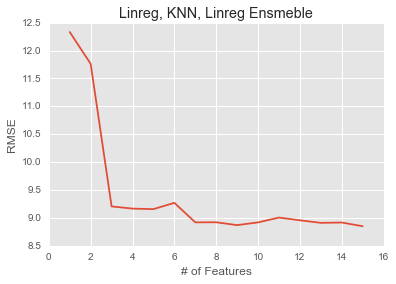

8.92706417113


In [35]:
feature_cols = ['63650' ,'64635', '64636', '63685', 'ESI', 'Lumbar Radiofrequency','Radiofrequency']
feature_cols =['63685', '63650', 'Radiofrequency', 'Lumbar Radiofrequency', '64636', '64635', 'ESI']

feature_cols =['63685', '63650', 'Radiofrequency', 'Lumbar Radiofrequency', '64636', '64635', 'ESI']
feature_cols =['63685', '63650', 'Radiofrequency', 'Lumbar Radiofrequency', '64636', '64635', 'ESI', '64484', '64493', '64494', '1r', '27096', '64633', '64634', '3']
feature_cols = ['63685', '63650', 'Radiofrequency', 'Lumbar Radiofrequency', '64636', '64635', 'ESI', '64484', '64493', '64494', '1r', '27096', '64633', '64634', '3']
mean2escoresFinal = []
features = []
for i in feature_cols:
    features += [i]
    X = dfNotNull[features]
    y = dfNotNull['TotalTimeMin']

    linreg = LinearRegression()
    linreg1 = LinearRegression()


    pipe = Pipeline([ ('union', FeatureUnion([
        ('linreg',EnsembleTranformer(linreg, y)),
        ('knn', EnsembleTranformer(knn , y)),
        ])) 
        ,('mdl', linreg1)
             ])
    

    mean2escores3 = cross_val_score(pipe, X, y, cv=5, scoring='mean_squared_error')
    mean2escoresFinal += [np.sqrt(-mean2escores3.mean())]
print mean2escoresFinal
plt.plot(np.arange(1,len(mean2escoresFinal)+1),np.array(mean2escoresFinal))
plt.title("Linreg, KNN, Linreg Ensmeble")
plt.ylabel('RMSE')
plt.xlabel('# of Features')
plt.show()

feature_cols =['63685', '63650', 'Radiofrequency', 'Lumbar Radiofrequency', '64636', '64635', 'ESI','1r'] 
X = dfNotNull[feature_cols]
y = dfNotNull['TotalTimeMin']
mean2escores3 = cross_val_score(pipe, X, y, cv=5, scoring='mean_squared_error')
print np.sqrt(-mean2escores3.mean())
    


In [29]:
"Select KBest Linear SGD Regression ensemble "


from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline, make_union
print "Run  regression without scalar and with cross validation xyy"

feature_cols =['64640', '63650', '64634', '64480', '64635', '64636', '64484', '20605', '63685', '63688', '62311', 
'62310', '63661', '64633', '64492', '64493', '64450', '27096', 'Gender', 'Age', 'F17', '3', '1r', 
'ESI', 'Lumbar Radiofrequency', 'Nerve Block 2', 'Radiofrequency']


feature_cols = ['64640', '63650', '64634', '64480', '64635', '64636', '64484', '20605', '63685', '63688', '62311', 
                '62310', '63661', '64494', '64495', '64633', '64490', '64491', '64492', '64493', '64450', '27096', 
                'Gender', 'AgeScaled', 'F17', '3', '1r', 'ESI', 'Lumbar Radiofrequency', 'Nerve Block 2', 'Radiofrequency']

X = dfNotNull[feature_cols]
total = []
y = dfNotNull['TotalTimeMin']
for i in range (1, len(feature_cols)+1):
    #gridsearch with select kbest
    SGD1 =  SGDRegressor(alpha=0.001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=1000, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)
    param_grid = dict()
    linreg4 = LinearRegression()
    knn = KNeighborsRegressor(n_neighbors = 14)
    filter1 = SelectKBest(k=i) # select the best 2 features
    linreg = LinearRegression()
    linreg1 = LinearRegression()
    filter1 = SelectKBest(k=i) # select the best 2 features
    pipe = Pipeline([('anova', filter1), ('union', FeatureUnion([
    ('linreg',EnsembleTranformer(linreg, y)),
    ('knn', EnsembleTranformer(knn , y)),
    ('sgd', EnsembleTranformer(SGD1 , y)),
        ])) 
    ,('mdl', linreg1)
     ])
    
    pipe = Pipeline([('anova', filter1), ('lr', linreg4)])
    grid1 = GridSearchCV(pipe, param_grid, cv=5, scoring='mean_squared_error').fit(X,y)
    grid2= GridSearchCV(pipe, param_grid, cv=5, scoring='mean_absolute_error').fit(X,y)
    
    tf_features=grid1.best_estimator_.named_steps['anova'].get_support()
    total += list(np.array(feature_cols)[tf_features])
    print 777
    print np.array(feature_cols)[tf_features]
    print 777
    abs_features=str(grid2.best_estimator_.named_steps['anova'].get_support())
    
    
    print grid1.best_estimator_
    mean2escores3 = cross_val_score(grid1.best_estimator_ , X, y, cv=5, scoring='mean_squared_error')
    
    
    
    mean2escores4 = cross_val_score(grid2.best_estimator_ , X, y, cv=5, scoring='mean_absolute_error')
   
    mean2escores =np.sqrt(-mean2escores3).mean()
    meanAbsScores= mean2escores4
    meanAbsScores= -meanAbsScores.mean()


    #print feature_list_creator(tf_features)
    print "mean squared error"
    print mean2escores3.mean()           
    print mean2escores
    print "mean Abs Scores"

    print meanAbsScores
    print '\n'

Run  regression without scalar and with cross validation xyy


TypeError: 'list' object is not callable

In [8]:
from collections import Counter
Counter(total).most_common(12)

list2 = []
for i in Counter(total).most_common(15):
    list2 +=[i[0]]
print list2

['63685', '63650', 'Radiofrequency', 'Lumbar Radiofrequency', '64636', '64635', 'ESI', '64484', '64493', '64494', '1r', '27096', '64633', '64634', '3']


[12.29583137684493, 3809139940477.0439, 9.2073523623930136, 9.1679128077841678, 9.1493290440816182, 9.1381308825743766, 8.8286940090240513, 8.8435303375476586, 8.8192956441848214, 8.8247186453119681, 8.8344791531267308, 8.7850144375828858, 8.7489567965424122, 8.7468521330391482, 8.7484487974036007]
13
14


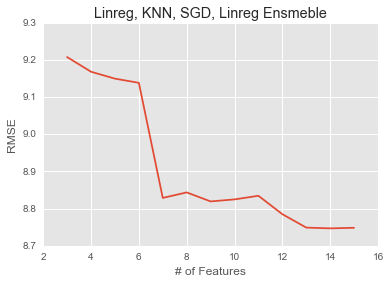

8.7965816929
6.13367502386


In [11]:
feature_cols = ['63650' ,'64635', '64636', '63685', 'ESI', 'Lumbar Radiofrequency','Radiofrequency']
feature_cols =['63685', '63650', 'Radiofrequency', 'Lumbar Radiofrequency', '64636', '64635', 'ESI']

feature_cols =['63685', '63650', 'Radiofrequency', 'Lumbar Radiofrequency', '64636', '64635', 'ESI']
feature_cols =['63685', '63650', 'Radiofrequency', 'Lumbar Radiofrequency', '64636', '64635', 'ESI', '64484', '64493', '64494', '1r', '27096', '64633', '64634', '3']

mean2escoresFinal = []
features = []
for i in feature_cols:
    features += [i]
    X = dfNotNull[features]
    y = dfNotNull['TotalTimeMin']
    linreg = LinearRegression()
    linreg1 = LinearRegression()
    knn = KNeighborsRegressor(n_neighbors = 14)
    SGD1 =  SGDRegressor(alpha=0.001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=1000, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

    pipe = Pipeline([('union', FeatureUnion([
    ('linreg',EnsembleTranformer(linreg, y)),
    ('knn', EnsembleTranformer(knn , y)),
    ('sgd', EnsembleTranformer(SGD1 , y)),
        ])) 
    ,('mdl', linreg1)
     ])
    
    

    mean2escores3 = cross_val_score(pipe, X, y, cv=5, scoring='mean_squared_error')
    mean2escoresFinal += [np.sqrt(-mean2escores3.mean())]
print mean2escoresFinal
print len(np.array(mean2escoresFinal)[2:])
print len(np.arange(2,len(mean2escoresFinal)+1))
plt.plot(np.arange(3,len(mean2escoresFinal)+1),np.array(mean2escoresFinal)[2:])

plt.title("Linreg, KNN, SGD, Linreg Ensmeble")
plt.ylabel('RMSE')
plt.xlabel('# of Features')
plt.show()


feature_cols =['63685', '63650', 'Radiofrequency', 'Lumbar Radiofrequency', '64636', '64635', 'ESI','1r'] 
X = dfNotNull[feature_cols]
y = dfNotNull['TotalTimeMin']
mean2escores3 = cross_val_score(pipe, X, y, cv=5, scoring='mean_squared_error')
mean2escores4 = cross_val_score(pipe, X, y, cv=5, scoring='mean_absolute_error')
print np.sqrt(-mean2escores3.mean())
print -mean2escores4.mean()

In [ ]:
"Predict on Out of Sample Data"

print predictions
pipe.fit
dfOOS = pandas.read_csv('OutOS.csv')
X = dfOOS[knn_features]
y = dfOOS['TotalTimeMin']
OutOfSamplePredictions = linreg.predict()








In [ ]:
print "Best Algorithms Best Scores!!!"

print """

Lingreg - no cpt codes deleted**********

[-141.8490452   -93.35778642  -61.82801688  -51.32990826  -55.10773072]
['64640', '63650', '64634', '64480', '64635', '64636', '64484', '20605', '63685', '63688', '62311', '62310', '63661', '64633', '64492', '64493', '64450', '27096', 'Gender', 'Age', 'F17', '1r', 'ESI', 'Lumbar Radiofrequency', 'Nerve Block 2', 'Radiofrequency']
mean squared error
8.80464997546
mean Abs Scores
6.09908443762


Linreg - Stepwise with select K-Best*************

Pipeline(steps=[('anova', SelectKBest(k=19, score_func=<function f_classif at 0x000000000AD405F8>)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])
['64640', '63650', '64634', '64635', '64636', '64484', '63685', '63688', '63661', '64494', '64633', '64493', '27096', 'Age', '3', '1r', 'ESI', 'Lumbar Radiofrequency', 'Radiofrequency']
mean squared error
-81.8369856139
8.86837633425
mean Abs Scores
6.14019789195

Linreg - Stepwise with select K-Best simpler but w/ comparable performance*************
Pipeline(steps=[('anova', SelectKBest(k=18, score_func=<function f_classif at 0x000000000AD405F8>)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])
['64640', '63650', '64634', '64635', '64636', '64484', '63685', '63688', '63661', '64494', '64633', '64493', '27096', '3', '1r', 'ESI', 'Lumbar Radiofrequency', 'Radiofrequency']
mean squared error
-81.9365729217
8.87247677311
mean Abs Scores
6.17155237326

Linreg - Stepwise with select K-Best Even simpler, only 9 features! but w/ comparable performance*************
Pipeline(steps=[('anova', SelectKBest(k=9, score_func=<function f_classif at 0x000000000A934668>)), ('neigh', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=11, p=2,
          weights='uniform'))])
['63650', '64635', '64636', '63685', '63688', '63661', 'ESI', 'Lumbar Radiofrequency', 'Radiofrequency']
mean squared error
-83.3528947549
8.91948101309
mean Abs Scores
6.25185553713




Lingreg - **********

['Lumbar Radiofrequency', 'Radiofrequency', 'ESI', 'Nerve Block 2', 'Injection', 'Medial Branch Block', '3', '1r', 'Gender', 'F17', 'Age']
mean squared error
9.98563469287
mean Abs Scores
6.40693830594








RandomForest Mean of 100 Itearations ********************
feature_cols =['Lumbar Radiofrequency',  'Radiofrequency', 'ESI','Nerve Block 2','Injection','Medial Branch Block' ]##
rfreg2 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=2, max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=7, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

root mean squared error
10.2626357568




"get null scores************"
Total Average Null:
17.3521970207
11.1181800916

Procedure Average Null:
10.2979764338
6.56061055948


LINREG - Select KBest  *****************

['Lumbar Radiofrequency', 'Spinal Cord Stimulator', 'Lumbar ESI', 'Radiofrequency', 'ESI', 'Spinal Cord Stimulator 2']

Root mean squared error:
10.3549488744
Mean Abs Scores:
6.58723506741


Ensemble - KNN and Linreg, ensembled by linreg *******************
KNN features = ['63650', '64635', '64636', '63685', '63688', '63661', 'Lumbar Radiofrequency', 'Radiofrequency']
LingerFeatures = ['64640', '63650', '64634', '64480', '64635', '64636', '64484', '20605', '63685', '63688', '62311', 
'62310', '63661', '64633', '64492', '64493', '64450', '27096', 'Gender', 'Age', 'F17', '3', '1r', 
'ESI', 'Lumbar Radiofrequency', 'Nerve Block 2', 'Radiofrequency']

Neighbors = 22
8.82012696377
6.08174753072







KNN
Pipeline(steps=[('anova', SelectKBest(k=8, score_func=<function f_classif at 0x000000000A934668>)), ('neigh', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=12, p=2,
          weights='uniform'))])
          
['63650', '64635', '64636', '63685', '63688', '63661', 'Lumbar Radiofrequency', 'Radiofrequency']
mean squared error
-85.3708057705
8.98504719777
mean Abs Scores
6.37585553713




Best Select Knn enemble

14 - 16.701090131478189, 16.67465530490216, 12.016567903236361, 11.492266264170976, 9.44732366364169, 9.4121308219127826, 9.3849997234646878, 9.3807695363951407, 9.1149238699650397, 9.2109388160485288, 9.3264846503283803, 9.0630729484270702, 9.0908347552785553, 9.003595136087915, 9.005505856815363, 8.8088782661242284, 8.9249534892496207, 8.8350301701324163, 8.8428685686560637, 8.891858353943574, 8.8565601249147488, 8.8802009771557842, 8.9053583070795845, 8.8779425585851808, 8.8245891248932331, 8.8095037928242448, 8.8046994989065634]


"""
